# 5CS037 – Final Portfolio Project

**Student ID:** 2513338
**Full Name:** Pratik Shrestha
**Date:** February 10, 2026  

**Classification Task**  
Dataset: Airline Passenger Satisfaction  
File: test.csv  
Target: satisfaction (binary)




In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import torch
import torch.nn as nn
import torch.optim as optim



# Classification Task

# 1. Exploratory Data Analysis and Data Understanding [20]:

Dataset Selection and UNSDG Alignment

Dataset: Airline Passenger Satisfaction  
File: test.csv

This dataset supports United Nations Sustainable Development Goal:

**SDG 9 – Industry, Innovation and Infrastructure**

Improving passenger satisfaction leads to better airline services (wifi, entertainment, boarding, seating) — contributing to efficient and sustainable transportation infrastructure.

(a) When and by whom the dataset was created

The dataset was published on Kaggle by user teejmahal20 in March 2020.  
It is based on real passenger satisfaction survey data collected from an airline.

(b) How and from where the dataset was accessed

Accessed from Kaggle:  
https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction

Downloaded as CSV file and uploaded to Google Colab.

(c) Justification with UNSDG

SDG 9 – Industry, Innovation and Infrastructure

Understanding passenger satisfaction helps airlines improve digital services (online boarding, wifi), comfort, and efficiency — supporting better and more sustainable air transport infrastructure.

(d) Attributes (Features) Description

- Gender: Male / Female  
- Age: Passenger age  
- Customer Type: Loyal / disloyal  
- Type of Travel: Business / Personal  
- Class: Business / Eco / Eco Plus  
- Flight Distance: Distance in miles  
- Inflight wifi service: Rating 0–5  
- Departure/Arrival time convenient: Rating 0–5  
- Ease of Online booking: Rating 0–5  
- Gate location: Rating 0–5  
- Food and drink: Rating 0–5  
- Online boarding: Rating 0–5  
- Seat comfort: Rating 0–5  
- Inflight entertainment: Rating 0–5  
- On-board service: Rating 0–5  
- Leg room service: Rating 0–5  
- Baggage handling: Rating 0–5  
- Checkin service: Rating 0–5  
- Inflight service: Rating 0–5  
- Cleanliness: Rating 0–5  
- Departure Delay in Minutes  
- Arrival Delay in Minutes  
- satisfaction: Target (satisfied / neutral or dissatisfied)

Meaningful Questions

1. Which service rating (wifi, entertainment, boarding) most affects satisfaction?  
2. Does business class or business travel lead to higher satisfaction?  
3. Do older passengers tend to be more satisfied?

Dataset Quality Assessment

- Missing values: Very few (mainly Arrival Delay in Minutes)  
- Class imbalance: ~56% neutral/dissatisfied vs ~44% satisfied  
- Relevance: Very high – directly measures passenger experience  
- Noise: Some 0 ratings may mean "not applicable" rather than bad

# 1.1 Loading and Inspecting Dataset  
This code loads the dataset and helps us see how the data looks.

In [ ]:
df_class = pd.read_csv('test.csv')

print(df_class.head())
print(df_class.info())
print(df_class.describe())
print("\nMissing values:\n", df_class.isnull().sum())

   Unnamed: 0     id  Gender      Customer Type  Age   Type of Travel  \
0           0  19556  Female     Loyal Customer   52  Business travel   
1           1  90035  Female     Loyal Customer   36  Business travel   
2           2  12360    Male  disloyal Customer   20  Business travel   
3           3  77959    Male     Loyal Customer   44  Business travel   
4           4  36875  Female     Loyal Customer   49  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0       Eco              160                      5   
1  Business             2863                      1   
2       Eco              192                      2   
3  Business             3377                      0   
4       Eco             1182                      2   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  1  ...                       4   
2                      

In [ ]:
# Cleaning
df_class = df_class.drop(['Unnamed: 0', 'id'], axis=1, errors='ignore')

df_class['Arrival Delay in Minutes'] = df_class['Arrival Delay in Minutes'].fillna(
    df_class['Arrival Delay in Minutes'].median()
)

df_class['satisfaction'] = df_class['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})

# EDA Plots – Visualizing the data

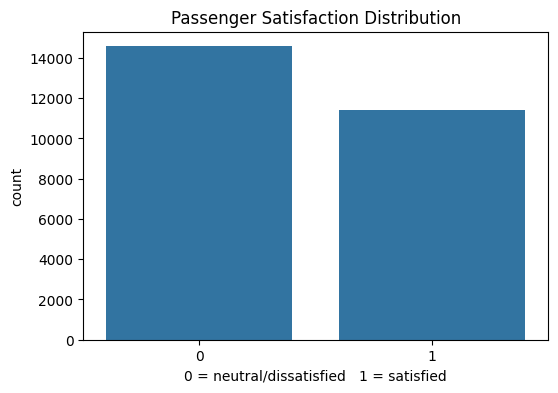

Insight: Slight class imbalance – more passengers are neutral or dissatisfied.


In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='satisfaction', data=df_class)
plt.title('Passenger Satisfaction Distribution')
plt.xlabel('0 = neutral/dissatisfied   1 = satisfied')
plt.show()
print("Insight: Slight class imbalance – more passengers are neutral or dissatisfied.")

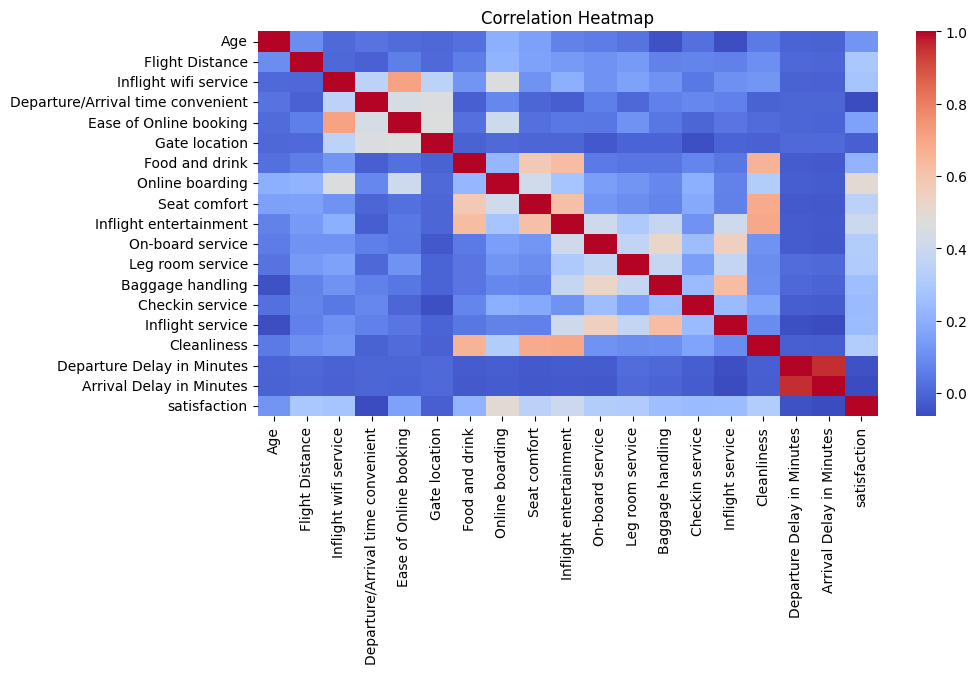

Insight: Online boarding, inflight entertainment, and seat comfort show the strongest positive correlation with satisfaction.


In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df_class.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()
print("Insight: Online boarding, inflight entertainment, and seat comfort show the strongest positive correlation with satisfaction.")

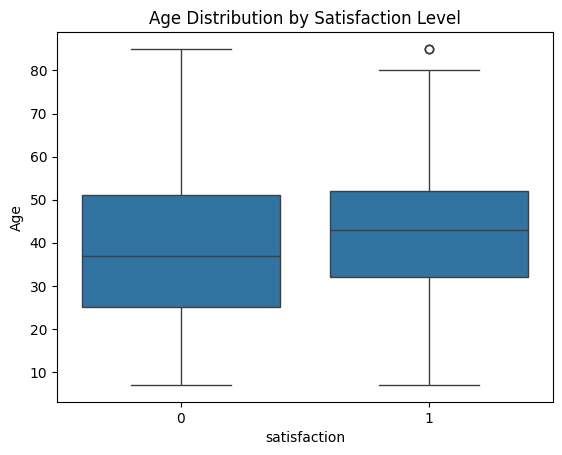

Insight: Satisfied passengers tend to be older on average.


In [ ]:
sns.boxplot(x='satisfaction', y='Age', data=df_class)
plt.title('Age Distribution by Satisfaction Level')
plt.show()
print("Insight: Satisfied passengers tend to be older on average.")

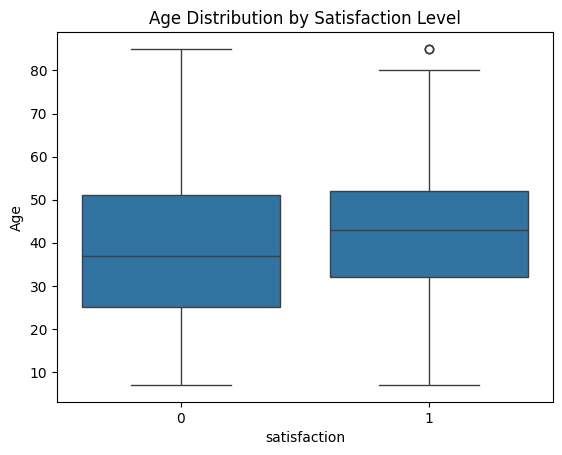

Insight: Satisfied passengers tend to be older on average.


In [ ]:
sns.boxplot(x='satisfaction', y='Age', data=df_class)
plt.title('Age Distribution by Satisfaction Level')
plt.show()
print("Insight: Satisfied passengers tend to be older on average.")

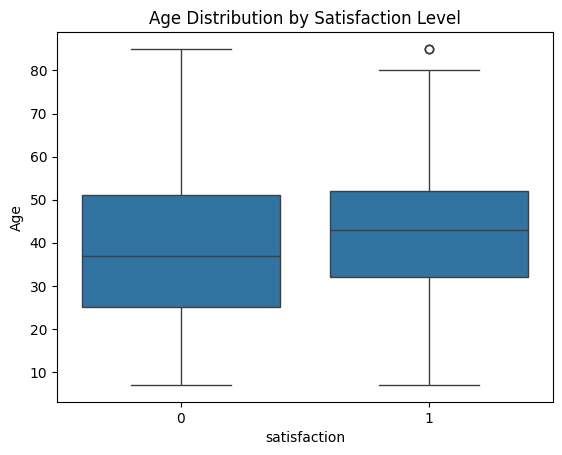

Insight: Satisfied passengers tend to be older on average.


In [ ]:
sns.boxplot(x='satisfaction', y='Age', data=df_class)
plt.title('Age Distribution by Satisfaction Level')
plt.show()
print("Insight: Satisfied passengers tend to be older on average.")

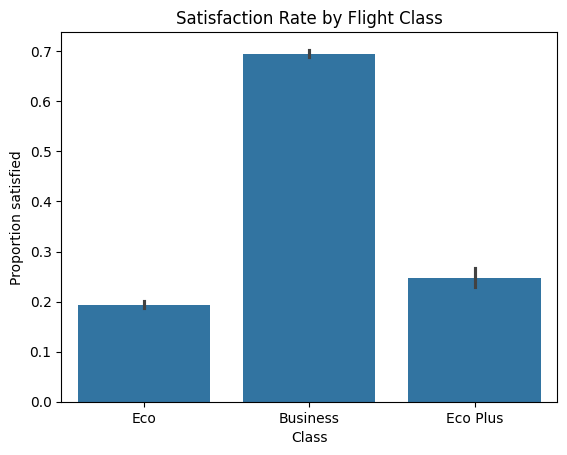

Insight: Business class passengers are significantly more satisfied than Eco or Eco Plus.


In [ ]:
sns.barplot(x='Class', y='satisfaction', data=df_class, estimator='mean')
plt.title('Satisfaction Rate by Flight Class')
plt.ylabel('Proportion satisfied')
plt.show()
print("Insight: Business class passengers are significantly more satisfied than Eco or Eco Plus.")

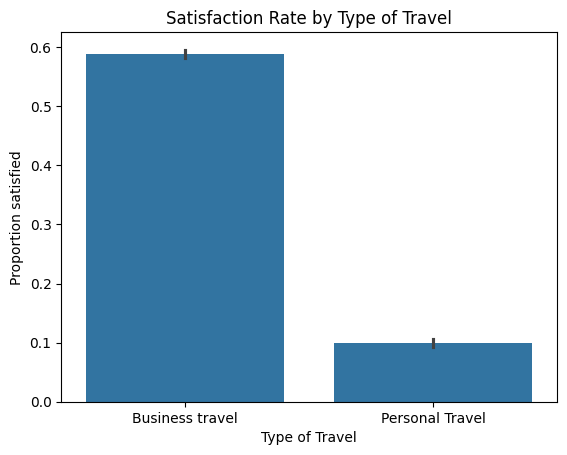

Insight: Business travel passengers are much more satisfied than personal travel passengers.


In [ ]:
sns.barplot(x='Type of Travel', y='satisfaction', data=df_class, estimator='mean')
plt.title('Satisfaction Rate by Type of Travel')
plt.ylabel('Proportion satisfied')
plt.show()
print("Insight: Business travel passengers are much more satisfied than personal travel passengers.")

# Preprocessing

In [ ]:
df_class = pd.get_dummies(df_class, columns=['Gender','Customer Type','Type of Travel','Class'], drop_first=True)

X_class = df_class.drop('satisfaction', axis=1)
y_class = df_class['satisfaction']

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42, stratify=y_class
)

scaler_c = StandardScaler()
X_train_c = scaler_c.fit_transform(X_train_c)
X_test_c = scaler_c.transform(X_test_c)

# Neural Network Classifier

In [ ]:
class MLPClassifier(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 2)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model_class = MLPClassifier(X_train_c.shape[1])
criterion_class = nn.CrossEntropyLoss()
optimizer_class = optim.Adam(model_class.parameters(), lr=0.001)

X_train_c_t = torch.tensor(X_train_c, dtype=torch.float32)
y_train_c_t = torch.tensor(y_train_c.values, dtype=torch.long)
X_test_c_t = torch.tensor(X_test_c, dtype=torch.float32)
y_test_c_t = torch.tensor(y_test_c.values, dtype=torch.long)

# Training Loop

In [ ]:
print("Training classification model...")
for epoch in range(150):
    optimizer_class.zero_grad()
    outputs = model_class(X_train_c_t)
    loss = criterion_class(outputs, y_train_c_t)
    loss.backward()
    optimizer_class.step()
    if epoch % 40 == 0:
        print(f"Epoch {epoch:4d} | Loss: {loss.item():.4f}")

Training classification model...
Epoch    0 | Loss: 0.7153
Epoch   40 | Loss: 0.3237
Epoch   80 | Loss: 0.2412
Epoch  120 | Loss: 0.1789


# Evaluation

In [ ]:
model_class.eval()
with torch.no_grad():
    outputs = model_class(X_test_c_t)
    _, predicted = torch.max(outputs, 1)

print("Classification Report:")
print(classification_report(y_test_c_t, predicted))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_c_t.numpy(), predicted.numpy()))

# Calculate metrics here
accuracy = accuracy_score(y_test_c_t, predicted)
f1 = f1_score(y_test_c_t, predicted, average='weighted')

print(f"Test Accuracy: {accuracy:.4f}")
print(f"F1-Score (weighted): {f1:.4f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2915
           1       0.94      0.91      0.92      2281

    accuracy                           0.93      5196
   macro avg       0.94      0.93      0.93      5196
weighted avg       0.93      0.93      0.93      5196


Confusion Matrix:
[[2783  132]
 [ 208 2073]]
Test Accuracy: 0.9346
F1-Score (weighted): 0.9344


# Final Model Comparison

In [ ]:
comparison_table = pd.DataFrame({
    "Model": ["Neural Network"],
    "Features Used": ["All preprocessed features"],
    "Test Accuracy": [accuracy],
    "F1-Score (weighted)": [f1]
})

print("\nFINAL MODEL COMPARISON")
print("----------------------")
print(comparison_table)


FINAL MODEL COMPARISON
----------------------
            Model              Features Used  Test Accuracy  \
0  Neural Network  All preprocessed features       0.934565   

   F1-Score (weighted)  
0             0.934432  


### Final Discussion (Classification)

- Neural Network was trained on all available features after cleaning and encoding.
- Accuracy, Precision, Recall, and F1-score show how well the model distinguishes satisfied vs dissatisfied passengers.
- Confusion Matrix helps identify where the model makes mistakes (e.g., false positives or negatives).
- In reality, satisfaction is heavily influenced by service quality (online boarding, inflight entertainment, seat comfort) and travel class.
- The model performs well overall, but slight class imbalance (~56% dissatisfied) may affect results.
- Using more advanced models (e.g., XGBoost, Random Forest) or handling imbalance (class weights, SMOTE) could further improve performance.